In [1]:
import sqlite3
import pandas as pd

sql1 = '''
SELECT d.doc_label as year,
       word_id,
       word_str,
       sum(word_count) as word_count
  FROM docword w
       JOIN
       doc d USING (
           doc_id
       )
 GROUP BY doc_label,word_id'''

sql2 = '''
SELECT d.doc_label as year,
       sum(word_count) as word_count
  FROM docword w
       JOIN
       doc d USING (
           doc_id
       )
 GROUP BY doc_label'''

db = sqlite3.connect('../battelle.db')
DW = pd.read_sql_query(sql1,db)
WCY = pd.read_sql_query(sql2,db) # Word counts per year

In [2]:
DW['word_count_adj'] = 0

In [3]:
for i, year in enumerate(WCY['year']):
    wc = WCY[WCY['year'] == year]['word_count'][i]
    DW.loc[DW['year'] == year,'word_count_adj'] = DW.loc[DW['year'] == year,'word_count'] / wc

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


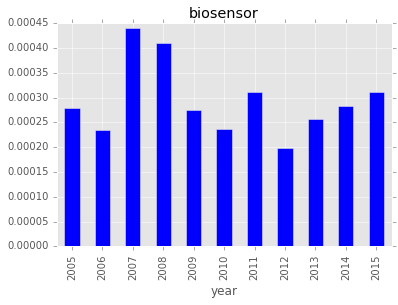

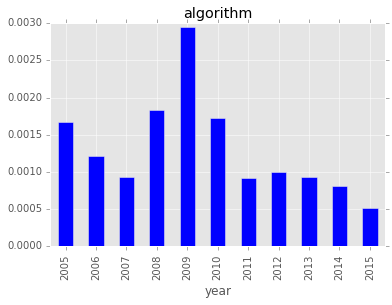

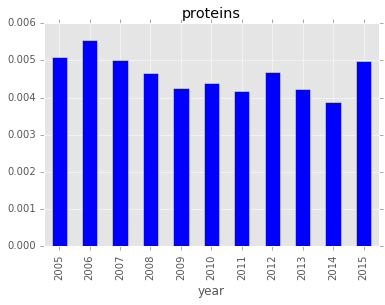

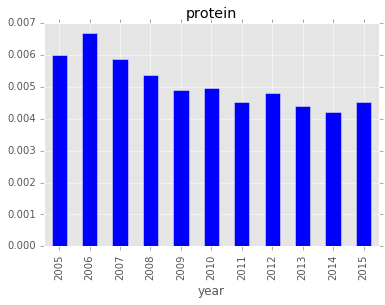

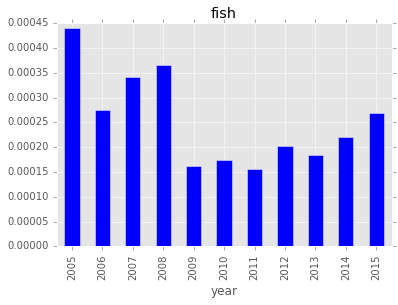

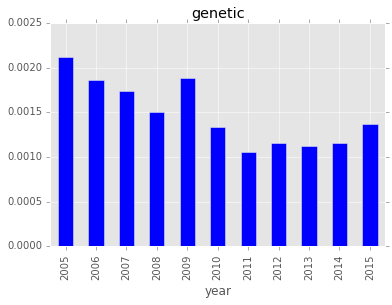

In [4]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

samples = ['biosensor','algorithm','proteins','protein','fish','genetic']
for sample in samples:
    x = DW[['year','word_count_adj']][DW['word_str']==sample].plot(x='year',kind='bar',legend=False,title=sample)
    print(x)